In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of big_mart_data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


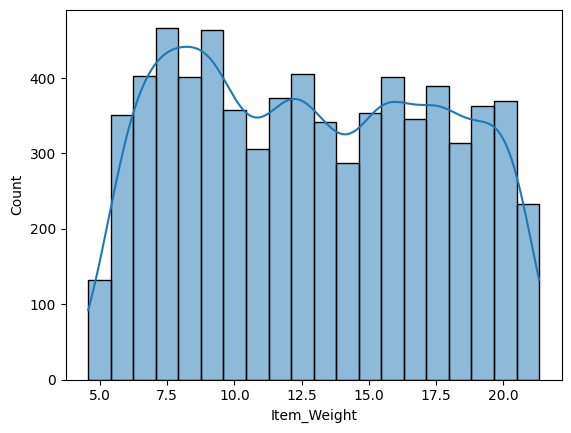

In [4]:
sns.histplot(data['Item_Weight'], bins=20, kde=True)
plt.show()

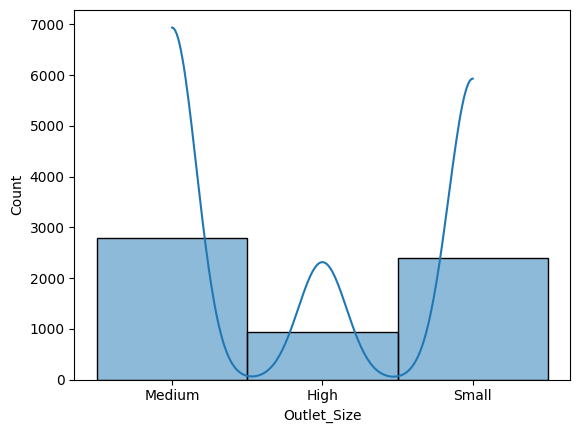

In [5]:
sns.histplot(data['Outlet_Size'], bins=20, kde=True)
plt.show()

In [6]:

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())


outlet_size_mode = data.pivot_table(values='Outlet_Size', columns=['Outlet_Location_Type', 'Outlet_Type'], aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        try:

            return outlet_size_mode.loc[row['Outlet_Location_Type'], row['Outlet_Type']]
        except KeyError:
            return data['Outlet_Size'].mode()[0]
    else:
        return row['Outlet_Size']

data['Outlet_Size'] = data.apply(fill_outlet_size, axis=1)

In [7]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [8]:
le = LabelEncoder()

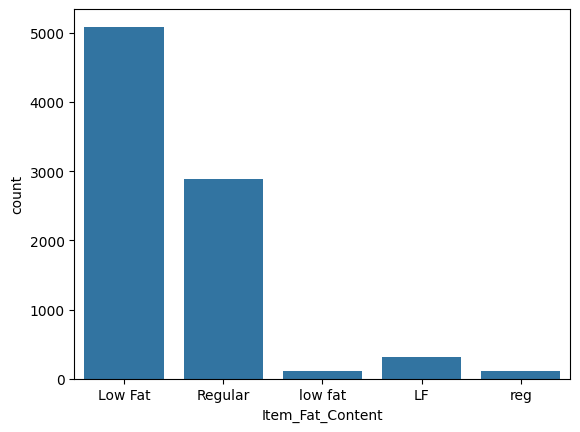

In [9]:
sns.countplot(x = 'Item_Fat_Content' , data = data)
plt.show()

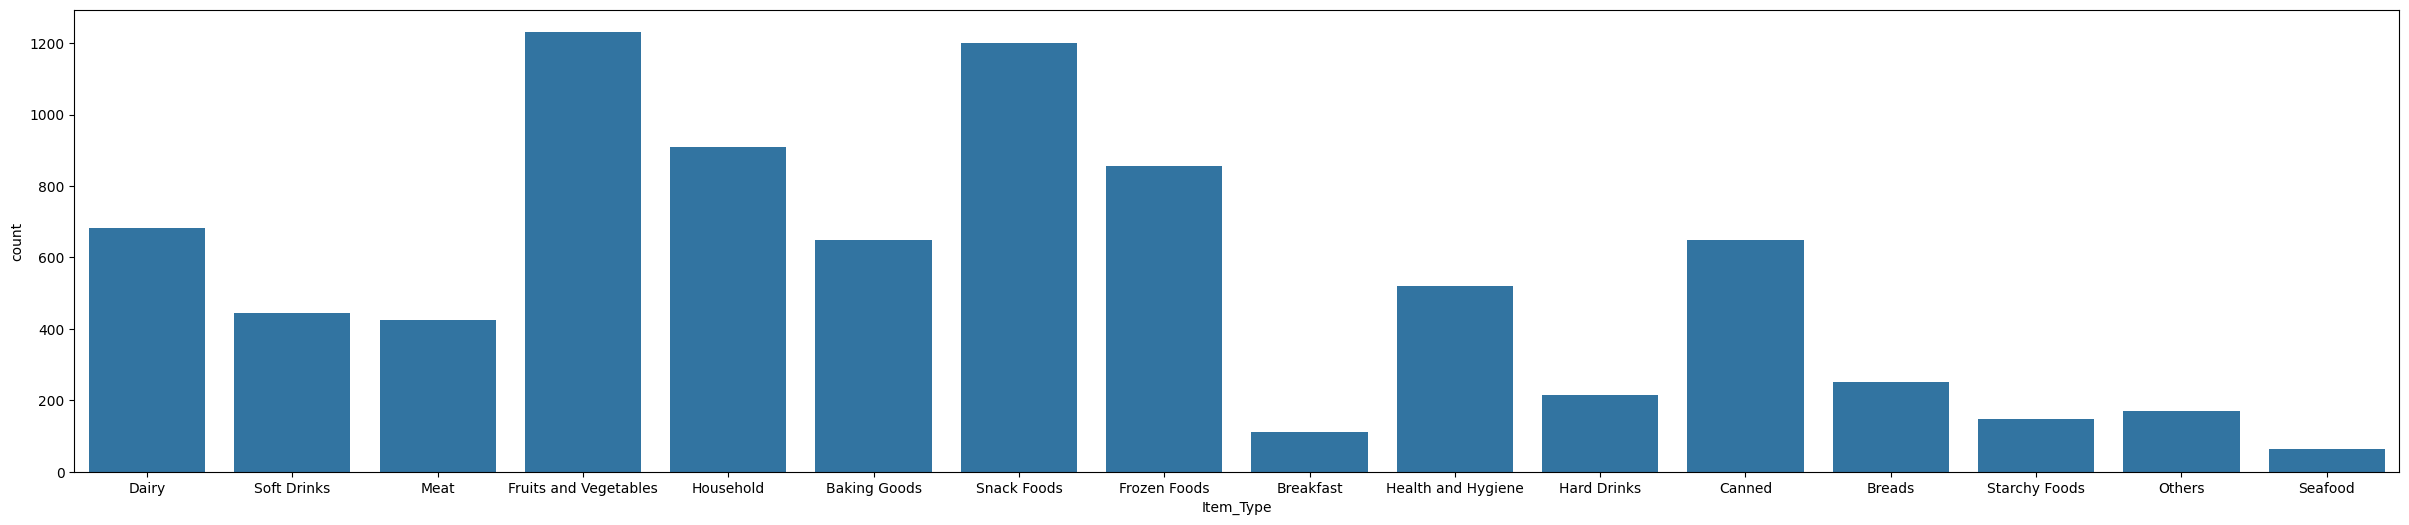

In [10]:
plt.figure(figsize=(30,6))
sns.countplot(x = 'Item_Type' , data = data)
plt.show()

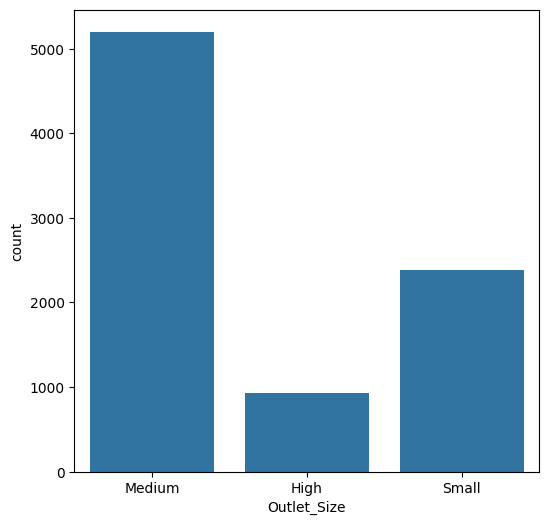

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Size' , data = data)
plt.show()

In [12]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [13]:
data = data.replace({'Item_Fat_Content': {'LF':'Low Fat' , 'low fat' : 'Low Fat' , 'reg' : 'Regular'}})

In [14]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [15]:
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])

In [16]:
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [17]:
data['Item_Type'] = le.fit_transform(data['Item_Type'])

In [18]:
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])

In [19]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [20]:
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])

In [21]:
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [22]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [23]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976
8522,50,14.800,0,0.044878,14,75.4670,8,1997,2,0,1,765.6700


In [24]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [32]:

model = XGBRegressor(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=0.1)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
prediction = model.predict(X_train)

In [36]:
r2score = r2_score(Y_train, prediction)
print('R2Score :', r2score)

R2Score : 0.6354019702075366


In [37]:
testprediction = model.predict(X_test)
r2scoretest = r2_score(Y_test, testprediction)
print('R2Score on test data:', r2scoretest)

R2Score on test data: 0.5866296954800392
